In [1]:
# import kagglehub
# import shutil
# import os

# sayedgamal99_smoke_fire_detection_yolo_path = kagglehub.dataset_download('sayedgamal99/smoke-fire-detection-yolo')
# destination_folder = "D:/t/SmokeFire"

# os.makedirs(destination_folder, exist_ok=True)
# shutil.copytree(sayedgamal99_smoke_fire_detection_yolo_path, destination_folder, dirs_exist_ok=True)

# print(f"Датасет успешно сохранён в: {destination_folder}")

In [2]:

# import kagglehub
# sayedgamal99_smoke_fire_detection_yolo_path = kagglehub.dataset_download('sayedgamal99/smoke-fire-detection-yolo')

# print('Data source import complete.')


<div style='background-color: #fff7f7; border: 2px solid '>
    <font size="+2" color="blue" ><b>🗂️1. Install libraries and Download a pre-trained checkpoint 🗂️</b></font>
</div>

In [3]:
# !pip install ultralytics
from ultralytics import YOLO
model = YOLO("yolo11n.pt")

<div style='background-color: #fff7f7; border: 2px solid '>
    <font size="+2" color="blue" ><b>📈 2. Data Analysis 📈</b></font>
</div>

Data analysis is in process...

Data analysis is in process...

Data analysis is in process...



C:\Users\User\AppData\Local\Temp\ipykernel_15204\1663057559.py:110: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names)
C:\Users\User\AppData\Local\Temp\ipykernel_15204\1663057559.py:110: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names)
C:\Users\User\AppData\Local\Temp\ipykernel_15204\1663057559.py:110: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names)


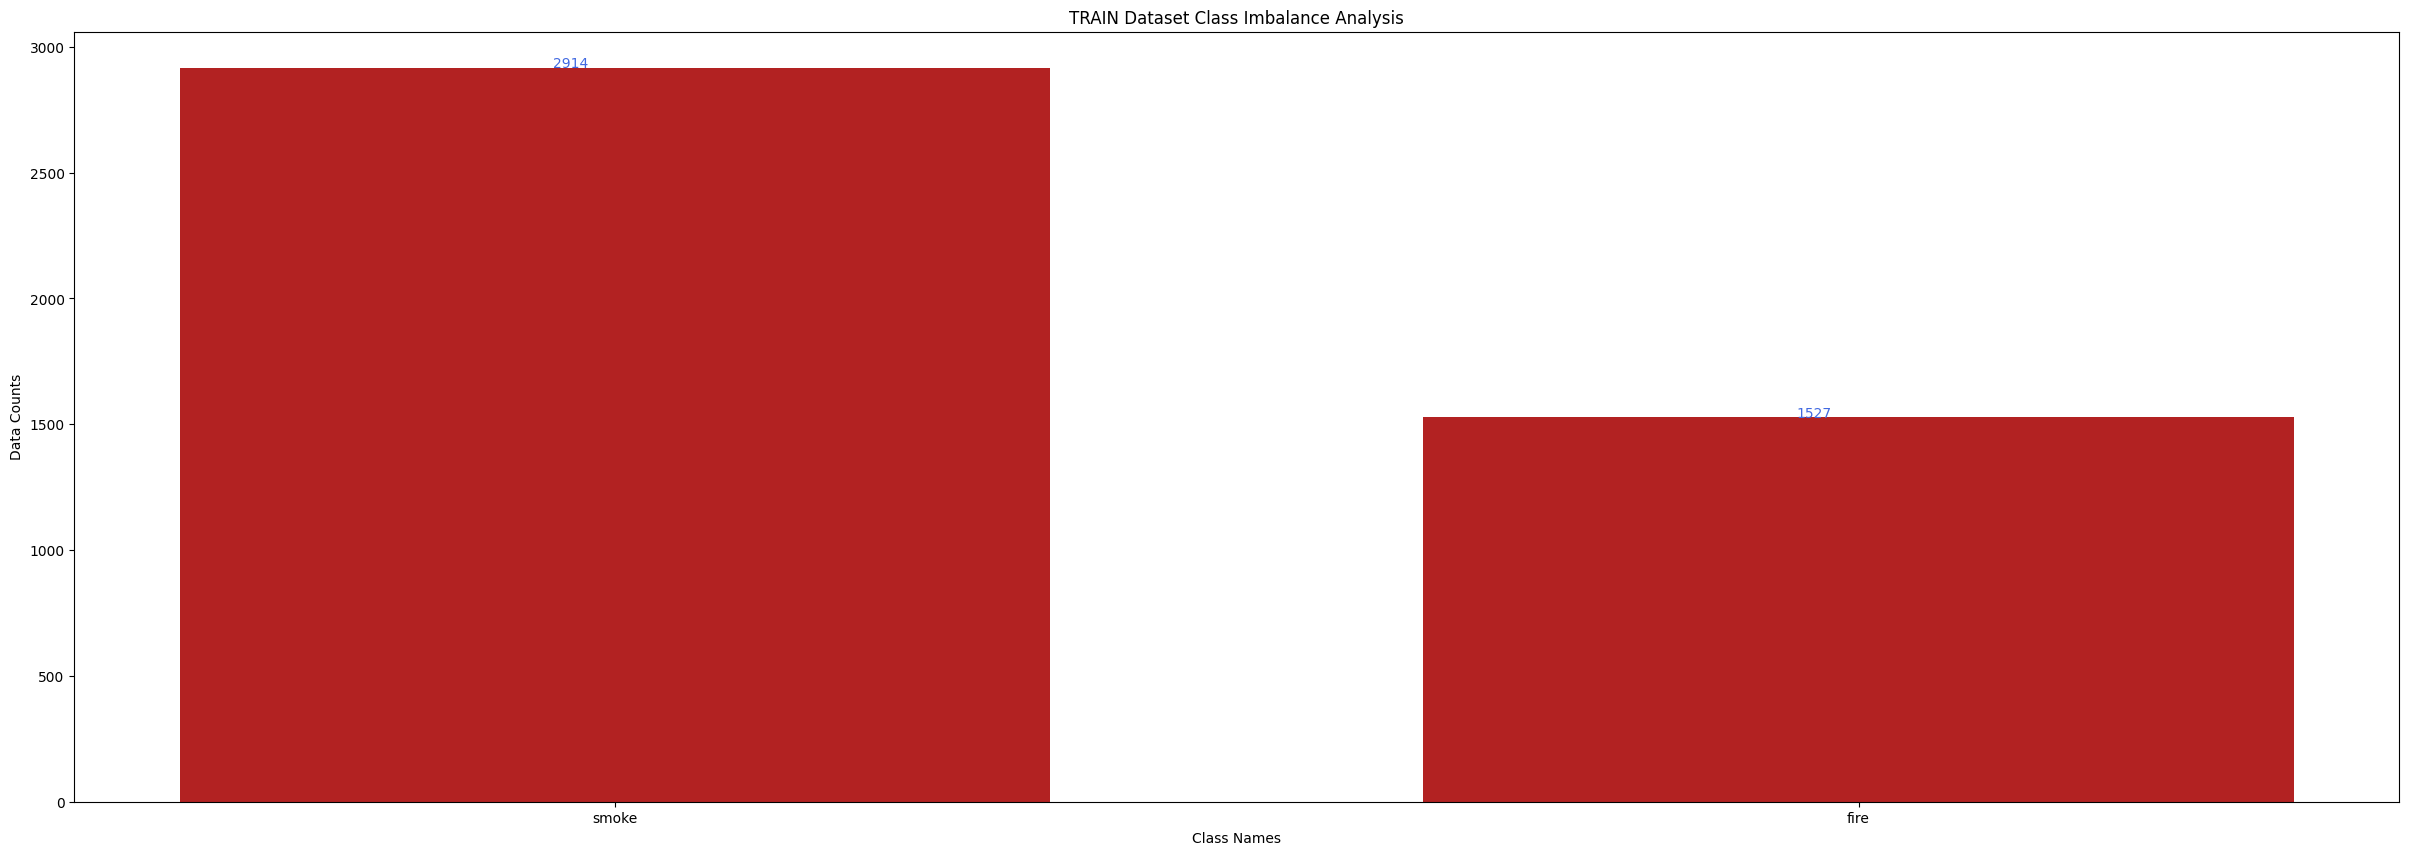

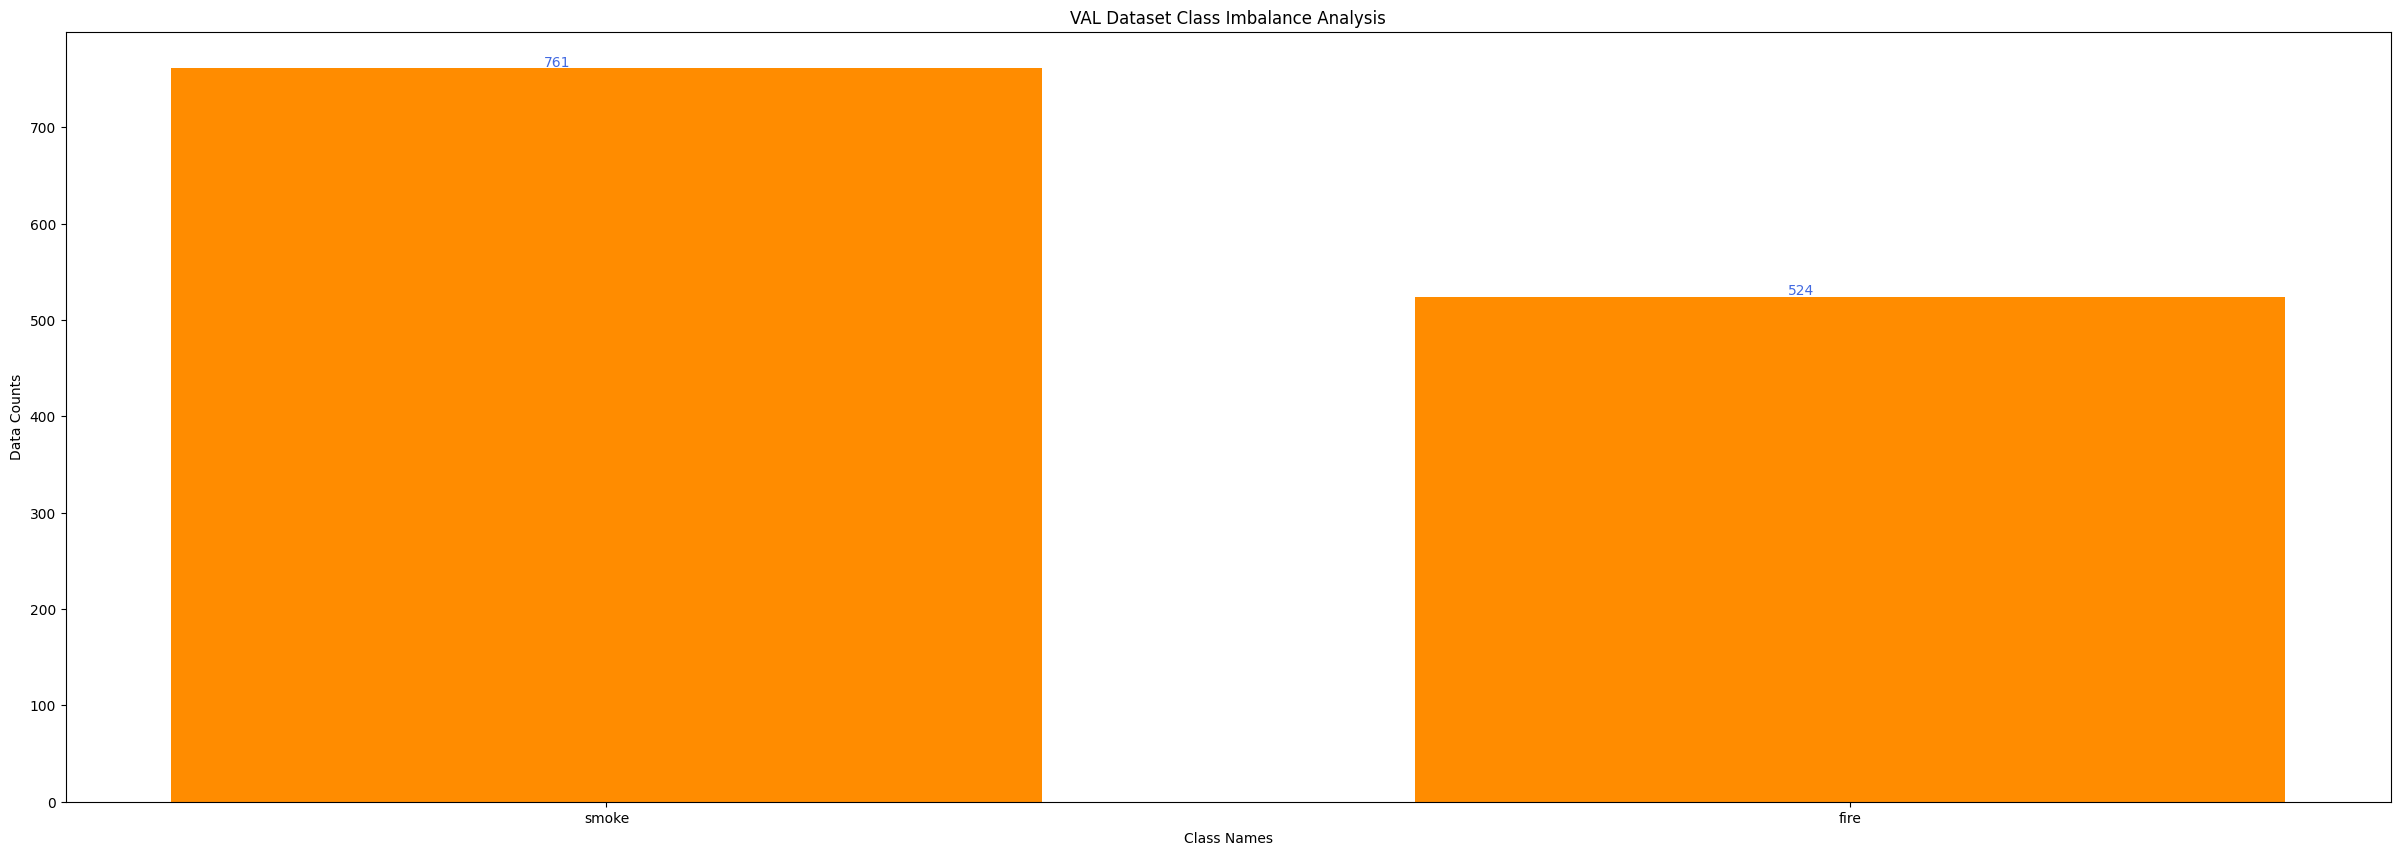

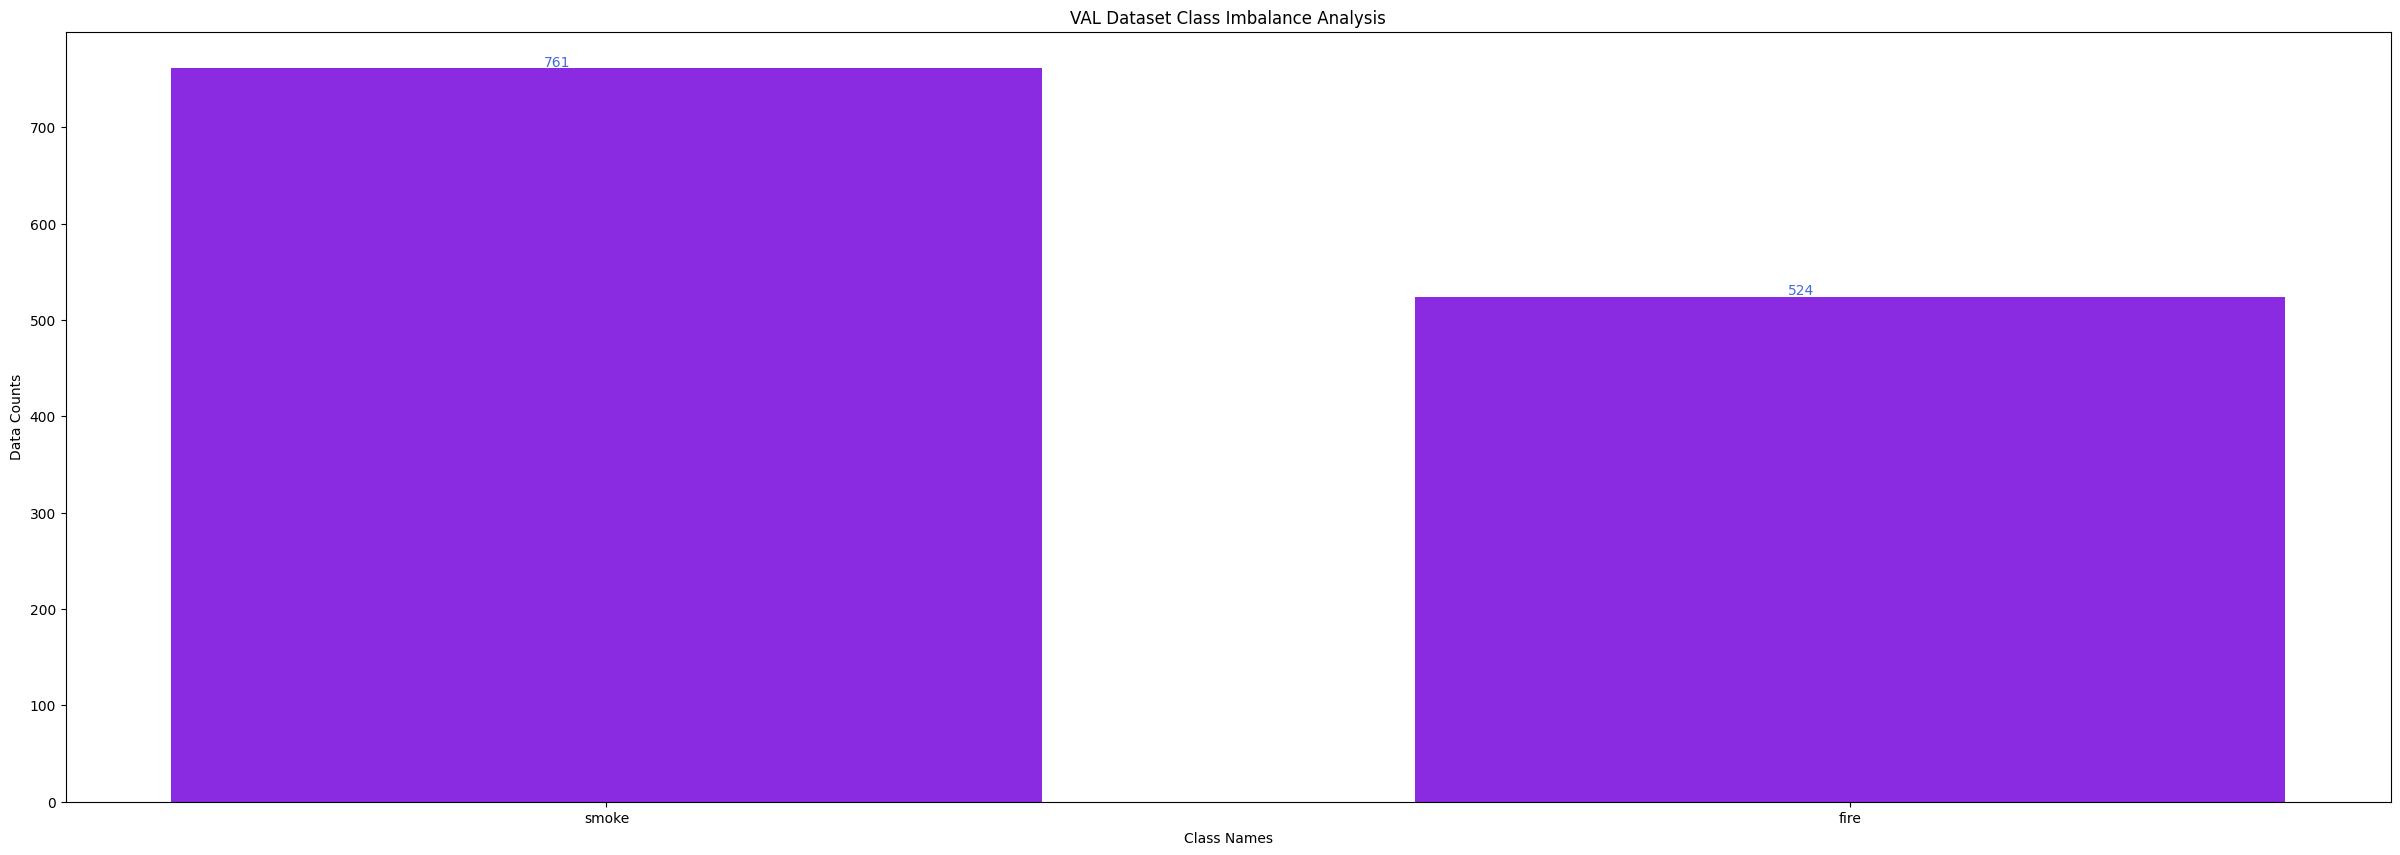

In [4]:
import os, cv2, yaml, random, numpy as np
from PIL import Image
from glob import glob
from matplotlib import pyplot as plt
from torchvision import transforms as T

class Visualization:

    def __init__(self, root, data_types, n_ims, rows, cmap = None):

        self.n_ims, self.rows = n_ims, rows
        self.cmap, self.data_types  = cmap, data_types
        self.colors = ["firebrick", "darkorange", "blueviolet"]

        self.get_cls_names(); self.get_bboxes()

    def get_cls_names(self):

        with open(f"{root}/data.yaml", 'r') as file: data = yaml.safe_load(file)
        # Extract class names
        class_names = data['names']

        # Create a dictionary with index as key and class name as value
        self.class_dict = {index: name for index, name in enumerate(class_names)}

    def get_bboxes(self):

        self.vis_datas, self.analysis_datas, self.im_paths = {}, {}, {}
        for data_type in self.data_types:
            all_bboxes, all_analysis_datas = [], {}
            im_paths = glob(f"{root}/data/{data_type}/images/*")

            for idx, im_path in enumerate(im_paths):
                # if idx == 3: break
                bboxes = []
                im_ext = os.path.splitext(im_path)[-1]
                lbl_path = im_path.replace(im_ext, ".txt")
                lbl_path  = lbl_path.replace(f"{data_type}/images", f"{data_type}/labels")
                if not os.path.isfile(lbl_path): continue
                meta_data = open(lbl_path).readlines()
                for data in meta_data:
                    # Split the string by space and strip the newline character
                    # Change here
                    parts = data.strip().split()[:5]
                    cls_name = self.class_dict[int(parts[0])]
                    # Convert first element to integer and the rest to float
                    bboxes.append([cls_name] + [float(x) for x in parts[1:]])
                    if cls_name not in all_analysis_datas: all_analysis_datas[cls_name] = 1
                    else: all_analysis_datas[cls_name] += 1
                all_bboxes.append(bboxes)

            self.vis_datas[data_type] = all_bboxes; self.analysis_datas[data_type] = all_analysis_datas; self.im_paths[data_type] = im_paths

    def plot(self, rows, cols, count, im_path, bboxes):

        plt.subplot(rows, cols, count)
        or_im = np.array(Image.open(im_path).convert("RGB"))
        height, width, _ = or_im.shape

        for bbox in bboxes:

            class_id, x_center, y_center, w, h = bbox

            # Convert YOLO format to pixel values
            x_min = int((x_center - w / 2) * width)  # x_min
            y_min = int((y_center - h / 2) * height)  # y_min
            x_max = int((x_center + w / 2) * width)  # x_max
            y_max = int((y_center + h / 2) * height)  # y_max

            color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
            cv2.rectangle(img = or_im, pt1 = (x_min, y_min), pt2 = (x_max, y_max), color = color, thickness = 3)
        plt.imshow(or_im)
        plt.axis("off"); plt.title(f"There is (are) {len(bboxes)} object(s) in the image.")

        return count + 1

    def vis(self, save_name):

        print(f"{save_name.upper()} Data Visualization is in process...\n")
        assert self.cmap in ["rgb", "gray"], "Please choose rgb or gray cmap"
        if self.cmap == "rgb": cmap = "viridis"
        cols = self.n_ims // self.rows; count = 1

        plt.figure(figsize = (25, 20))

        indices = [random.randint(a = 0, b = len(self.vis_datas[save_name]) - 1) for _ in range(self.n_ims)]

        for idx, index in enumerate(indices):

            if count == self.n_ims + 1: break

            im_path, bboxes = self.im_paths[save_name][index], self.vis_datas[save_name][index]

            count = self.plot(self.rows, cols, count, im_path = im_path, bboxes = bboxes)

        plt.show()

    def data_analysis(self, save_name, color):

        print("Data analysis is in process...\n")

        width, text_width, text_height = 0.7, 0.05, 2
        cls_names = list(self.analysis_datas[save_name].keys()); counts = list(self.analysis_datas[save_name].values())

        _, ax = plt.subplots(figsize = (30, 10))
        indices = np.arange(len(counts))

        ax.bar(indices, counts, width, color = color)
        ax.set_xlabel("Class Names", color = "black")
        ax.set_xticklabels(cls_names)
        ax.set(xticks = indices, xticklabels = cls_names)
        ax.set_ylabel("Data Counts", color = "black")
        ax.set_title(f"{save_name.upper()} Dataset Class Imbalance Analysis")

        for i, v in enumerate(counts): ax.text(i - text_width, v + text_height, str(v), color = "royalblue")

    def visualization(self): [self.vis(save_name) for save_name in self.data_types]

    def analysis(self): [self.data_analysis(save_name, color) for (save_name, color) in zip(self.data_types, self.colors)]

# root = "/kaggle/input/smoke-fire-detection-yolo"
root =  r"D:\t\dataset_fire_smoke"  #D:/t/SmokeFire"
vis = Visualization(root = root, data_types = ["train", "val", "val"], n_ims = 20, rows = 5, cmap = "rgb")
vis.analysis()

<div style='background-color: #fff7f7; border: 2px solid '>
    <font size="+2" color="blue" ><b>📊 3. Data Visualization 📊</b></font>
</div>

TRAIN Data Visualization is in process...



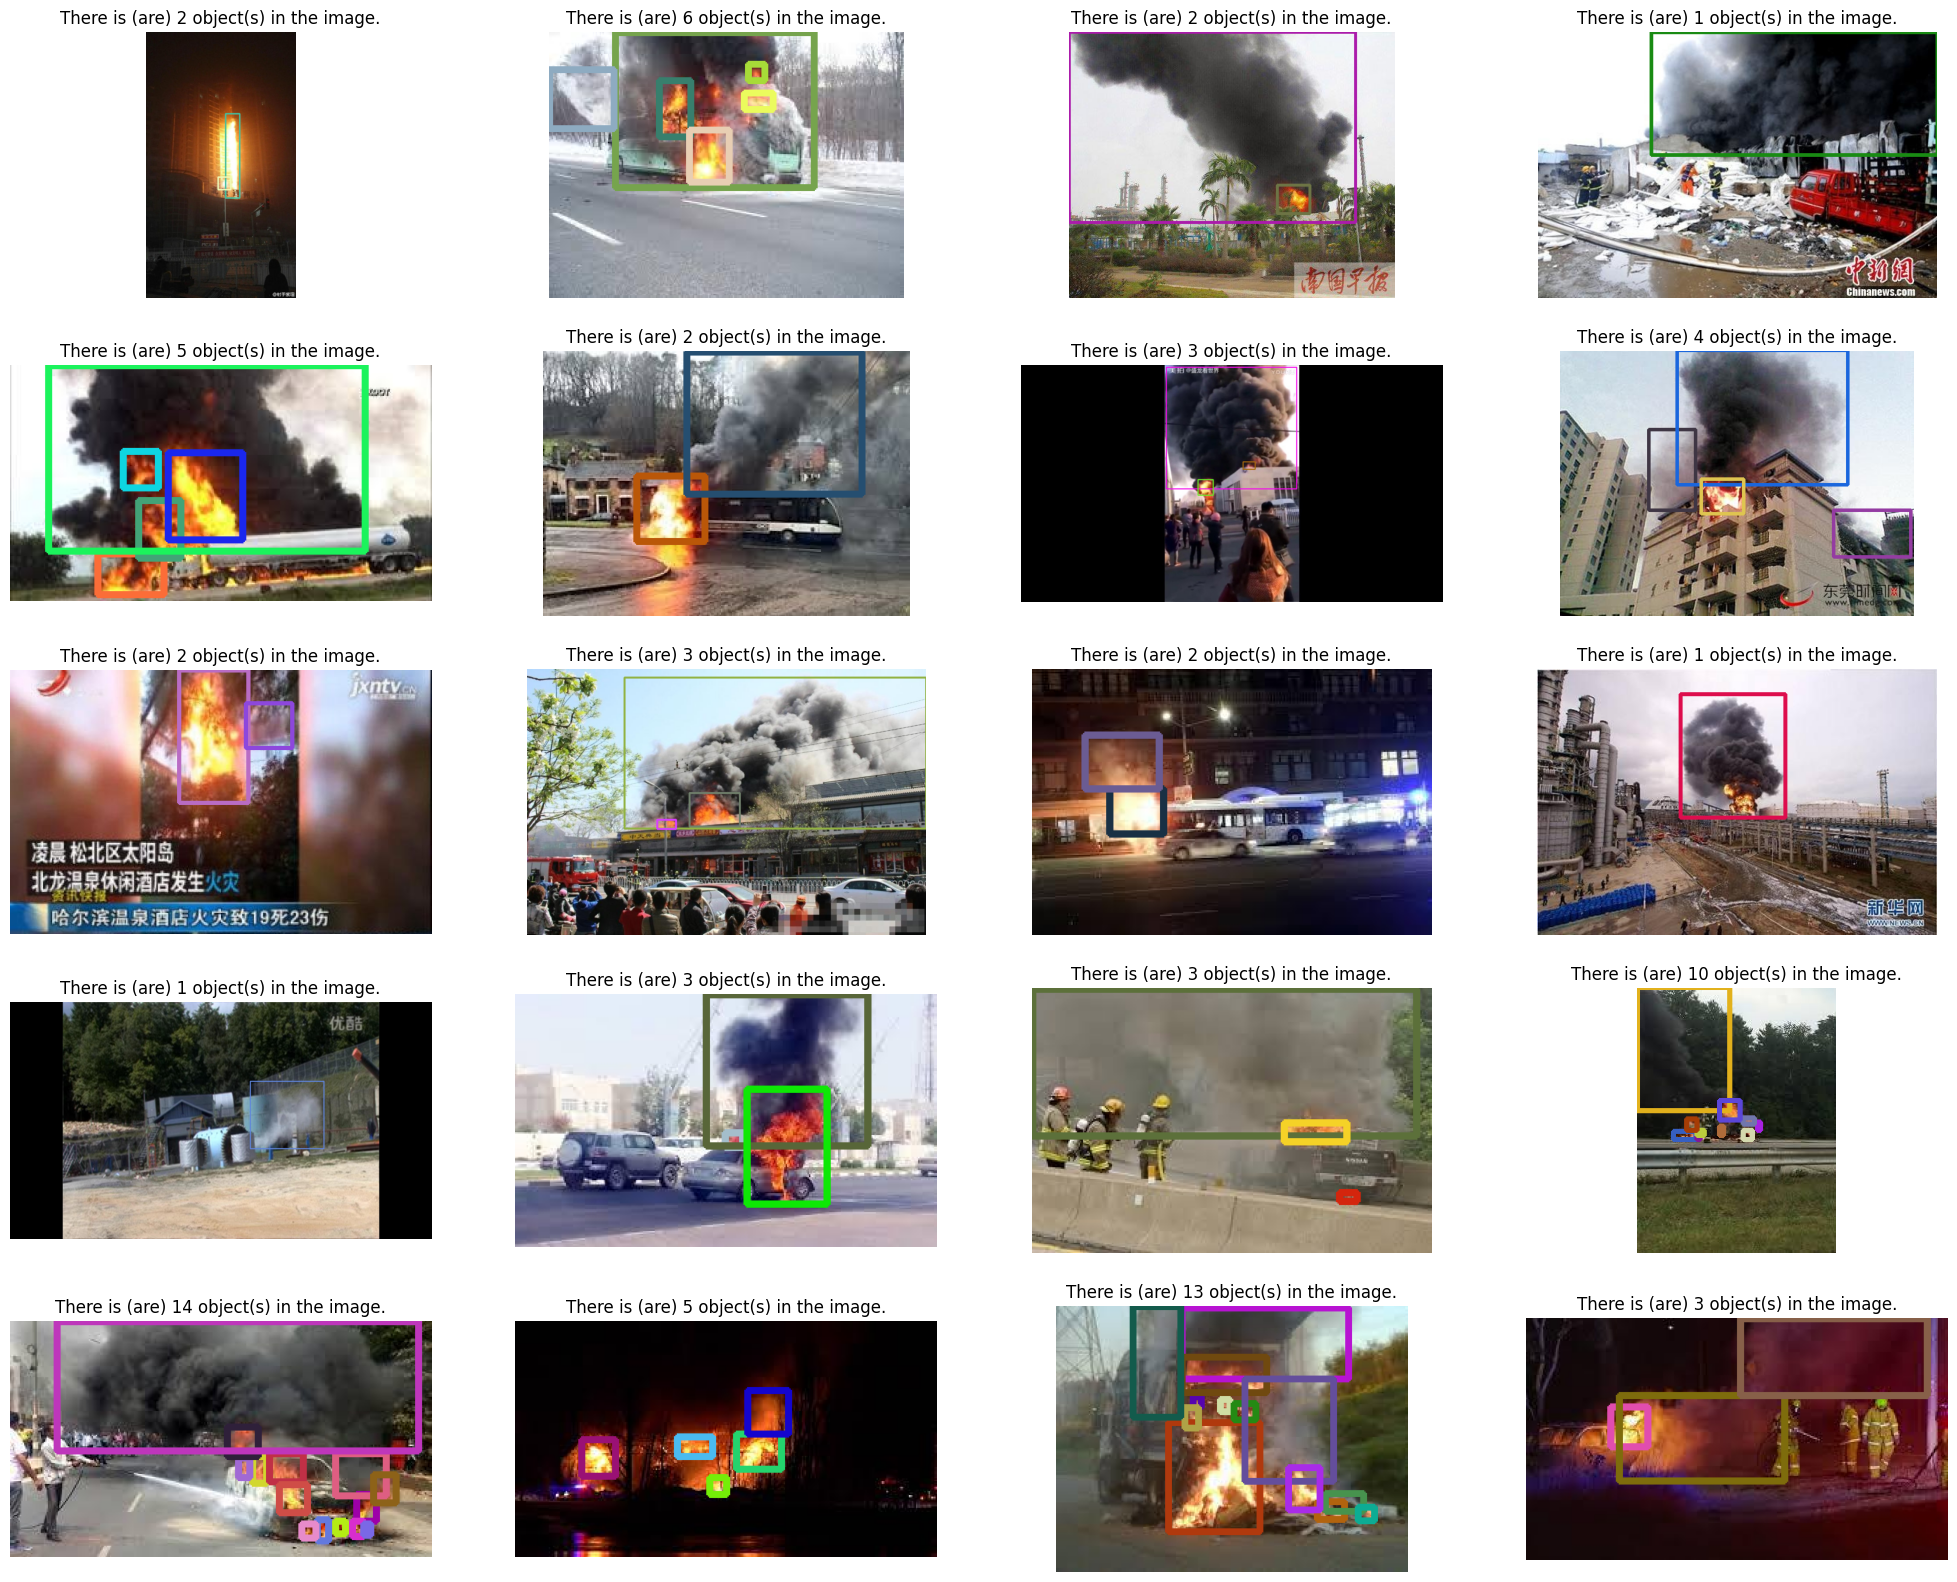

VAL Data Visualization is in process...



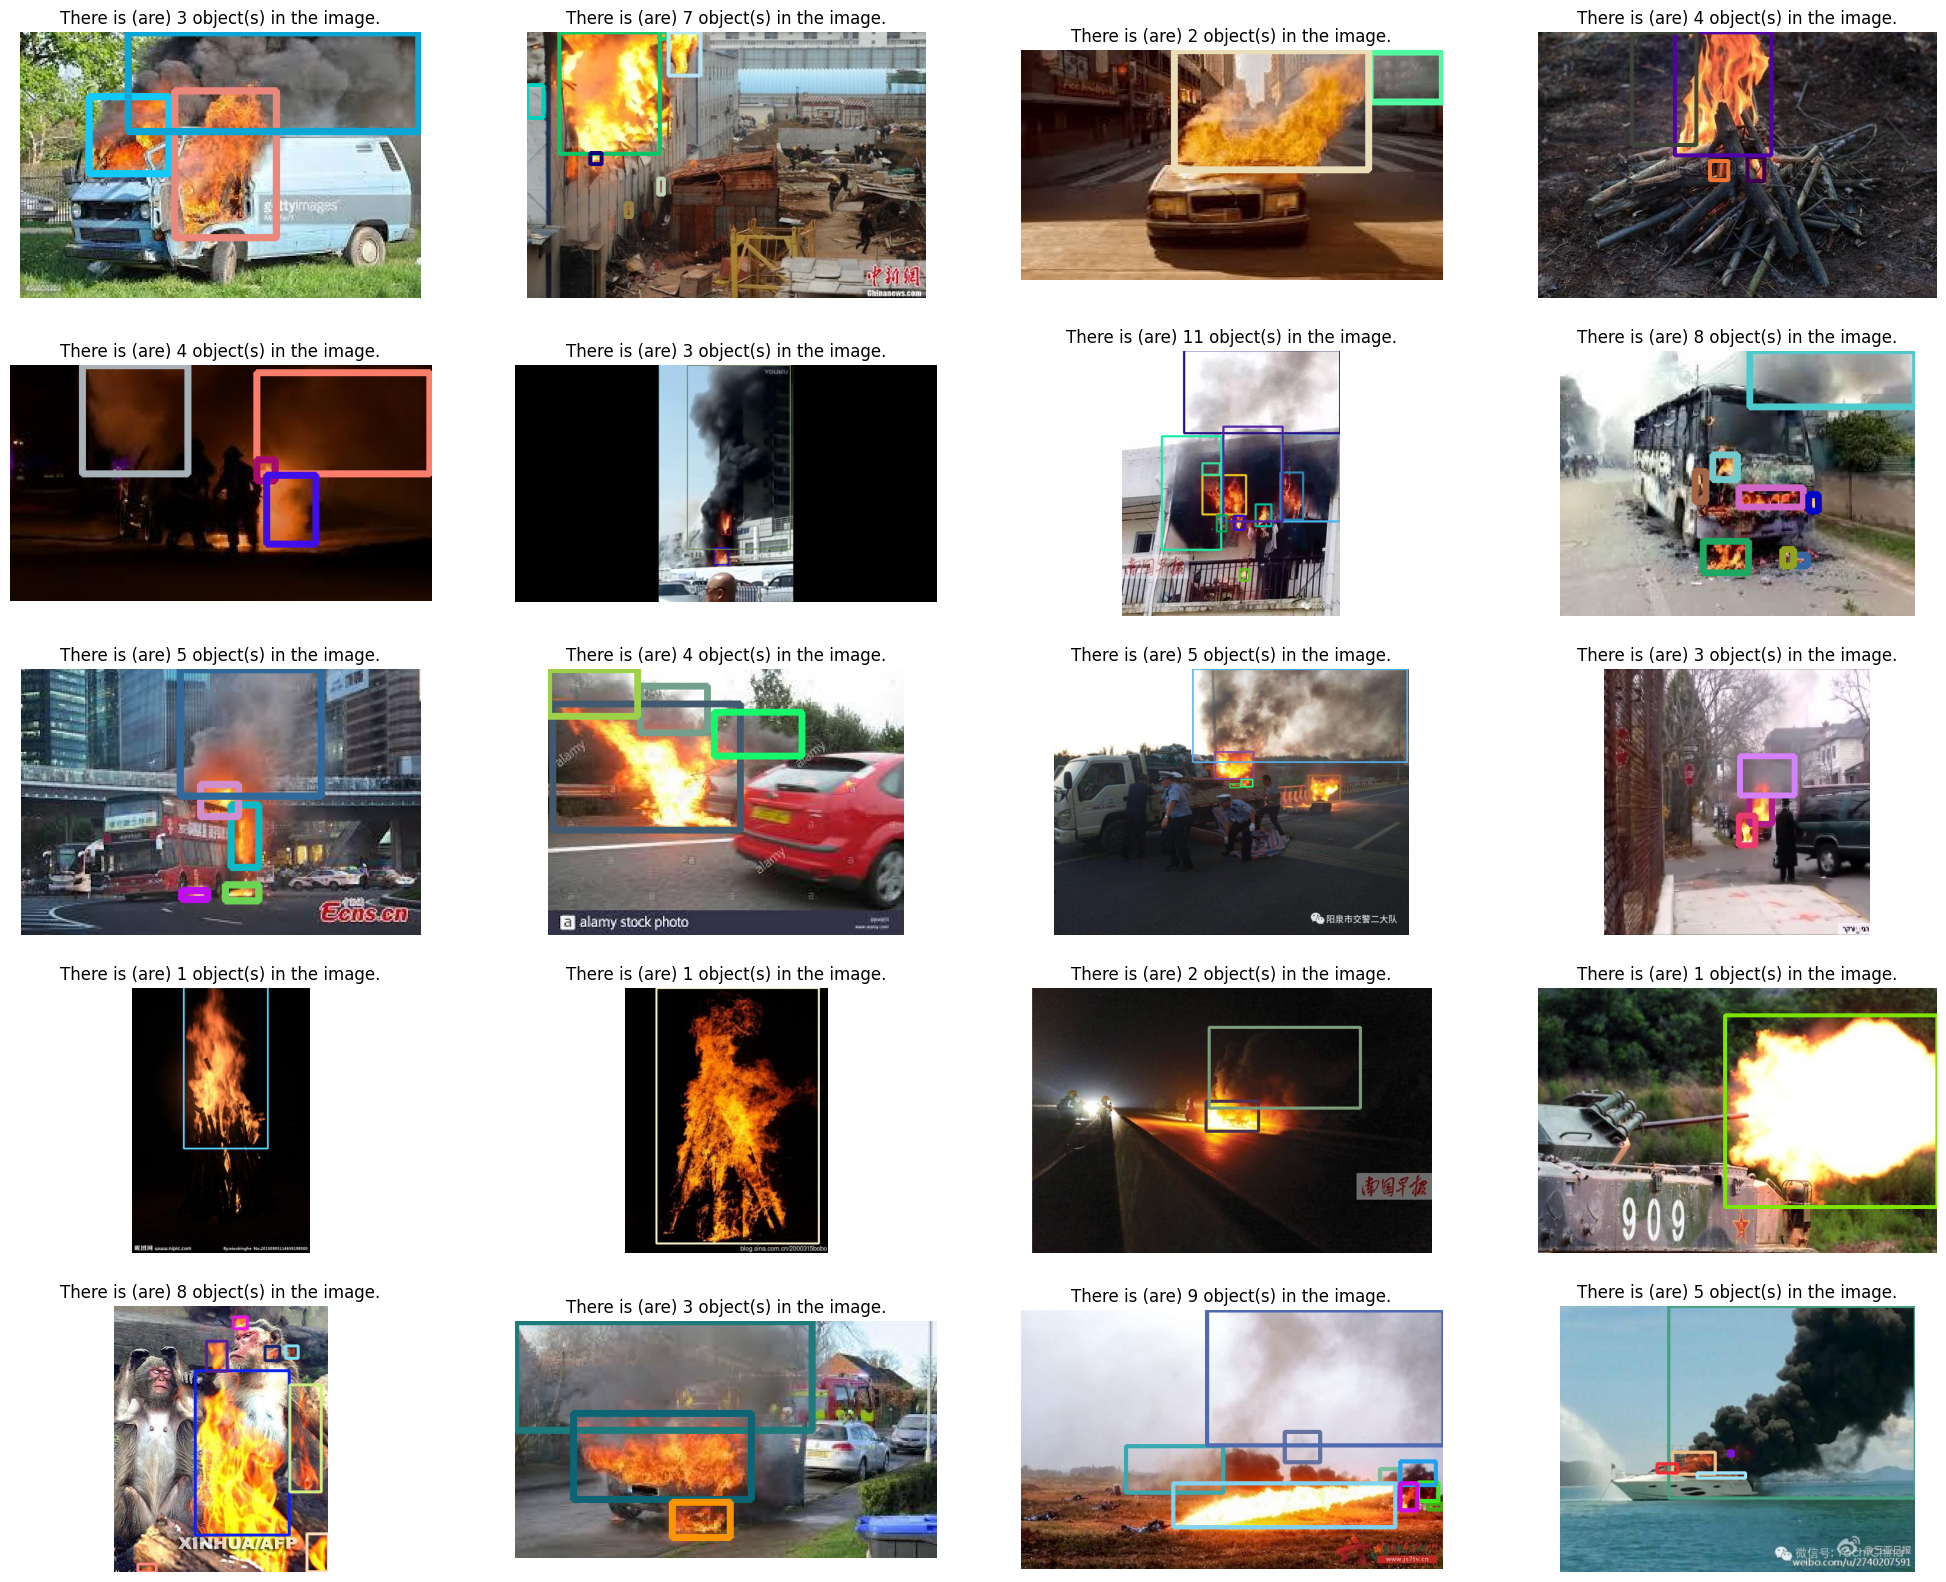

VAL Data Visualization is in process...



In [ ]:
vis.visualization()

<div style='background-color: #fff7f7; border: 2px solid '>
    <font size="+2" color="blue" ><b>✨ 4. AI Model Train✨</b></font>
</div>

In [ ]:
# Load YAML content into a Python dictionary
# yml_file_path = f"{root}/data.yaml"
# yml_file_path = "D:/t/SmokeFire/data.yaml" 
yml_file_path = r"D:\t\dataset_fire_smoke\data.yaml" 

with open(yml_file_path, 'r') as file: data = yaml.safe_load(file)

# Update the paths
data['train'] = f'{root}/data/train'
data['val']   = f'{root}/data/val'
data['test']  = f'{root}/data/val'

print(data)


{'path': '/dataset_fire_smoke/', 'train': 'D:\\t\\dataset_fire_smoke/data/train', 'val': 'D:\\t\\dataset_fire_smoke/data/val', 'test': 'D:\\t\\dataset_fire_smoke/data/val', 'names': ['smoke', 'fire'], 'nc': 2}


In [ ]:
# # Save the updated YAML content to a file
output_path = r'D:\t\updated_config.yml'
with open(output_path, 'w') as file: yaml.dump(data, file, default_flow_style=False)

In [ ]:
train_results = model.train(
    data=output_path,
    # data = r"D:\t\dataset_fire_smoke\data.yaml",
    epochs=10,  # number of training epochs
    imgsz=640,  # training image size
    workers=0,  # number of workers for data loading
    device=[0]
    )  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu

New https://pypi.org/project/ultralytics/8.3.105 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.82  Python-3.10.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=D:\t\updated_config.yml, epochs=10, time=None, patience=100, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=[0], workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

train: Scanning D:\t\dataset_fire_smoke\data\train\labels.cache... 1142 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1142/1142 [00:00<?, ?it/s]
val: Scanning D:\t\dataset_fire_smoke\data\val\labels.cache... 308 images, 0 backgrounds, 0 corrupt: 100%|██████████| 308/308 [00:00<?, ?it/s]


Plotting labels to runs\detect\train7\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 480 train, 480 val
Using 8 dataloader workers
Logging results to runs\detect\train7
Starting training for 10 epochs...
Closing dataloader mosaic


<div style='background-color: #fff7f7; border: 2px solid '>
    <font size="+2" color="blue" ><b>😍 5. Learning Curves 😍</b></font>
</div>

In [ ]:
Image.open(f"runs/detect/train/confusion_matrix.png")

In [ ]:
Image.open(f"runs/detect/train/results.png")

In [ ]:
Image.open(f"runs/detect/train/P_curve.png")

In [ ]:
Image.open(f"runs/detect/train/PR_curve.png")

In [ ]:
Image.open(f"runs/detect/train/val_batch0_pred.jpg")

<div style='background-color: #fff7f7; border: 2px solid '>
    <font size="+2" color="blue" ><b>✅6. Inference with Test Dataset✅</b></font>
</div>

In [ ]:
inference_results = model(f"{root}/data/val/images", device = 0, verbose = False)

In [ ]:
def inference_vis(res, n_ims, rows):
    cols = n_ims // rows
    plt.figure(figsize = (20, 10))
    for idx, r in enumerate(res):
        if idx == n_ims: break
        plt.subplot(rows, cols, idx + 1)
        or_im_rgb = np.array(Image.open(r.path).convert("RGB"))
        if idx == n_ims: break
        for i in r:
            for bbox in i.boxes:
                box = bbox.xyxy[0]
                x1, y1, x2, y2 = box
                coord1, coord2 = (int(x1), int(y1)), (int(x2), int(y2))
                cv2.rectangle(or_im_rgb, coord1, coord2, color=(255,255,0), thickness=10)
        plt.imshow(or_im_rgb)
        plt.title(f"Image#{idx + 1}")
        plt.axis("off")
inference_vis(res = inference_results, n_ims = 15, rows = 3)